# e2e

> Fill in a module description here

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import io
import json
import math
import os

import numpy as np
import pandas as pd
from PIL import Image

#from fastai.vision.all import *
#from portfolio_search.embeddings import *
#from portfolio_search.fileorg import *

## Loading TSV's and Centroids

In [ ]:
subclusters_dir = (
    singleline_data_home() / "raster/epoch-20231214/04_SUBCLUSTERS"
)

In [ ]:
drawing_centroids_fname = f"{subclusters_dir}/centroids_drawings.json"
with open(drawing_centroids_fname, "r") as infile:
    drawing_centroids = json.load(infile)

In [ ]:
watercolor_centroids_fname = f"{subclusters_dir}/centroids_watercolors.json"
with open(watercolor_centroids_fname, "r") as infile:
    watercolor_centroids = json.load(infile)

In [ ]:
clustered_drawings_tsv_fname = f"{subclusters_dir}/clustered_drawings.tsv"
# drawings_df.to_csv(
#     clustered_drawings_tsv_fname, index=True, index_label="idx", sep="\t", header=True
# )
clustered_drawings_df = pd.read_csv(
    clustered_drawings_tsv_fname, delimiter="\t", index_col="idx"
)
clustered_drawings_df.head()

,abs_fname,rel_fname,label,pred_label,pred_idx,pred_probs,emb_csv,cluster,cluster_dist,metacluster,...,drawings_cluster48_id,drawings_cluster48_dist,drawings_cropped_cluster16_id,drawings_cropped_cluster16_dist,drawings_cropped_cluster32_id,drawings_cropped_cluster32_dist,drawings_cropped_cluster48_id,drawings_cropped_cluster48_dist,drawings_cropped_cluster64_id,drawings_cropped_cluster64_dist
idx,,,,,,,,,,,,,,,,,,,,,
0,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb77p043.jpg,art,xtra,4,"0.168532,0.008473,0.008068,0.016940,0.797986","-0.6198182,-0.5714155,-0.6871516,-0.6553513,-0...",11,199.22961,1,...,15,166.33705,15,265.844100,15,257.350560,15,268.67297,58,276.82034
1,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb67p021.jpg,art,xtra,4,"0.170976,0.008673,0.008480,0.017028,0.794843","1.1073987,0.3512016,-0.73929733,-0.6553513,1.7...",3,132.26111,0,...,45,137.20117,14,121.146545,31,122.172424,31,116.40921,34,122.04242
2,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb25p227.jpg,art,xtra,4,"0.158396,0.008277,0.007424,0.016584,0.809319","1.3776337,-0.5714155,-0.2587232,-0.6553513,1.3...",8,188.58075,0,...,8,148.63470,10,220.298950,1,217.335360,1,213.25168,1,191.67163
3,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb48p057.jpg,art,xtra,4,"0.165322,0.008453,0.008010,0.016587,0.801628","2.4936543,0.17563903,-0.6522293,-0.55642915,1....",14,90.26291,0,...,28,83.96362,2,144.254030,21,129.951970,21,140.07254,21,144.77570
4,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb77p044.jpg,art,xtra,4,"0.171638,0.008182,0.008061,0.016469,0.795650","2.170152,-0.01916939,-0.47766963,-0.6553513,-0...",4,176.29102,0,...,39,169.47894,15,151.277310,15,141.268980,15,145.39337,58,151.13809


In [ ]:
clustered_watercolors_tsv_fname = f"{subclusters_dir}/clustered_watercolors.tsv"
# watercolors_df.to_csv(
#     clustered_watercolors_tsv_fname,
#     index=True,
#     index_label="idx",
#     sep="\t",
#     header=True,
# )
clustered_watercolors_df = pd.read_csv(
    clustered_watercolors_tsv_fname, delimiter="\t", index_col="idx"
)
clustered_watercolors_df.head()

,abs_fname,rel_fname,label,pred_label,pred_idx,pred_probs,emb_csv,cluster,cluster_dist,metacluster,...,handlabeled_metacluster_name,handlabeled_metacluster_id,handlabeled_metacluster_was_correct,preprocessed_abs_path,handlabeled_abs_path,emb_csv_cropped,watercolors_cluster_id,watercolors_cluster_dist,watercolors_cropped_cluster_id,watercolors_cropped_cluster_dist
idx,,,,,,,,,,,,,,,,,,,,,
0,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb07p104.jpg,art,xtra,4,"0.177406,0.008799,0.008245,0.017177,0.788373","-0.39105213,0.96309596,-0.73929733,0.4489988,0...",5,238.33170,1,...,1_watercolors,1,True,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,"-0.6198182,0.8895926,-0.73929733,0.6418346,0.4...",7,215.02927,7,206.64117
1,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb31p017.jpg,art,xtra,4,"0.172119,0.008924,0.008226,0.016950,0.793781","-0.05104202,-0.3935787,-0.73929733,0.86878717,...",11,191.66959,1,...,1_watercolors,1,True,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,"1.491735,-0.5714155,-0.73929733,0.05867392,0.5...",4,199.03098,4,195.97546
2,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb05p079.jpg,art,xtra,4,"0.172158,0.008873,0.008536,0.017017,0.793416","1.8089037,-0.5714155,-0.73929733,-0.10773122,-...",11,140.32997,1,...,1_watercolors,1,NaN,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,"-0.6013173,-0.5714155,-0.7368871,-0.6553513,-0...",4,142.76602,4,248.37231
3,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb26p082.jpg,art,xtra,4,"0.179525,0.008828,0.008282,0.017196,0.786169","1.8392665,0.3796271,-0.73929733,0.82189727,1.6...",7,176.11029,1,...,1_watercolors,1,NaN,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,"0.8175719,0.48385304,-0.73929733,1.0291914,1.4...",1,157.93832,1,196.84943
4,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,art/sb69p101-color.jpg,art,xtra,4,"0.179525,0.008828,0.008282,0.017196,0.786169","-0.23259398,-0.5714155,-0.73929733,-0.6553513,...",7,187.45346,1,...,1_watercolors,1,NaN,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,/Users/al/Dropbox/2-Areas/2-Sketchbooks/datase...,"0.14908737,-0.5714155,-0.73929733,0.44245207,-...",1,167.27823,1,136.63800


## viz functions

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def show_all_clusters(
    clusters_df, clusters, cluster_idxs=None, title=None, fname=None, size_factor=1.0
):
    select_idxs = cluster_idxs if cluster_idxs else range(len(clusters))
    num_clusters = len(select_idxs)
    examples_per_cluster = 16
    fig = plt.figure(
        figsize=(examples_per_cluster * size_factor, num_clusters * size_factor)
    )

    # hide borders
    fig.patch.set_visible(False)

    grid = ImageGrid(
        fig,
        111,  # similar to subplot(111)
        nrows_ncols=(num_clusters, examples_per_cluster),
        axes_pad=0.02,
    )
    for row, cluster_idx in enumerate(select_idxs):
        print(f"cluster_idx = {cluster_idx}, clusters = {clusters[cluster_idx]}")
        imgs = [
            Image.open(clusters_df.iloc[i].preprocessed_abs_path)
            for i in clusters[cluster_idx]
        ]

        for col, im in enumerate(imgs):
            total_idx = col + row * examples_per_cluster
            ax = grid[total_idx]
            ax.grid = False
            ax.set_xticks([])
            ax.set_yticks([])
            if col == 0:
                ax.set_ylabel(f"{cluster_idx}  ", rotation=0)
            ax.imshow(im)
    if title:
        fig.suptitle(
            title
            if cluster_idxs is None
            else f"{title} (Cluster IDs: {','.join([str(i) for i in select_idxs])})"
        )
    if not fname:
        plt.show()
    else:
        with io.BytesIO() as buf:
            plt.savefig(buf, format="png")
            plt.close()
            img = Image.open(buf)
            img.save(fname)
            buf.seek(0)
            buf.truncate()


def show_cluster(clusters_df, clusters, idx, fname=None, title=None, size_factor=1.0):
    imgs = [
        Image.open(clusters_df.iloc[i].preprocessed_abs_path) for i in clusters[idx]
    ]

    fig = plt.figure(figsize=(16.0 * size_factor, 16.0 * size_factor))
    if title:
        fig.suptitle(title)

    # hide borders
    fig.patch.set_visible(False)

    grid = ImageGrid(
        fig,
        111,  # similar to subplot(111)
        nrows_ncols=(4, 4),  # creates 2x2 grid of axes
        axes_pad=0.1,  # pad between axes in inch.
    )

    for ax, im in zip(grid, imgs):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.grid = False
        ax.set_xticks([])
        ax.set_yticks([])

    if not fname:
        plt.show()
    else:
        with io.BytesIO() as buf:
            plt.savefig(buf, format="png")
            plt.close()
            img = Image.open(buf)
            img.save(fname)
            buf.seek(0)
            buf.truncate()

## verify viz functions

In [ ]:
# inspect shape of cluster centroid data
for emb_type, cluster_colnames in drawing_centroids.items():
    print(emb_type)
    for cluster_col, saved_data in cluster_colnames.items():
        D, I = saved_data
        print("\t" + cluster_col)

drawings_emdb
	drawings_cluster8
	drawings_cluster16
	drawings_cluster32
	drawings_cluster48
	drawings_cluster64
drawings_cropped_emdb
	drawings_cropped_cluster8
	drawings_cropped_cluster16
	drawings_cropped_cluster32
	drawings_cropped_cluster48
	drawings_cropped_cluster64


In [ ]:
cluster_col = "drawings_cluster8"

D, I = drawing_centroids["drawings_emdb"][cluster_col]

show_all_clusters(
    clusters_df=clustered_drawings_df,
    clusters=I,
    # title=cluster_col, ## skip title, so the layout uses the full space
    size_factor=2.0,
    fname=f"{subclusters_dir}/{cluster_col}.png",
)

cluster_idx = 0, clusters = [271, 814, 1682, 932, 600, 391, 1058, 878, 368, 149, 1442, 364, 1858, 1037, 1382, 945]
cluster_idx = 1, clusters = [542, 1292, 1634, 1274, 704, 19, 80, 919, 1244, 609, 771, 129, 334, 1102, 1364, 1553]
cluster_idx = 2, clusters = [274, 1408, 268, 521, 20, 913, 345, 1257, 523, 286, 190, 1401, 1021, 636, 1139, 1095]
cluster_idx = 3, clusters = [653, 1733, 1591, 300, 1397, 905, 808, 912, 1641, 749, 249, 1021, 1576, 900, 48, 1882]
cluster_idx = 4, clusters = [1727, 1805, 714, 1204, 848, 258, 562, 309, 172, 687, 3, 763, 92, 1898, 277, 1423]
cluster_idx = 5, clusters = [1607, 649, 597, 1072, 1316, 266, 573, 999, 562, 956, 918, 1364, 927, 896, 1129, 678]
cluster_idx = 6, clusters = [305, 1517, 319, 16, 394, 1769, 308, 1673, 1418, 1637, 489, 1891, 909, 1827, 583, 1047]
cluster_idx = 7, clusters = [1716, 1381, 370, 842, 530, 1047, 1809, 989, 918, 76, 1332, 871, 346, 927, 257, 678]


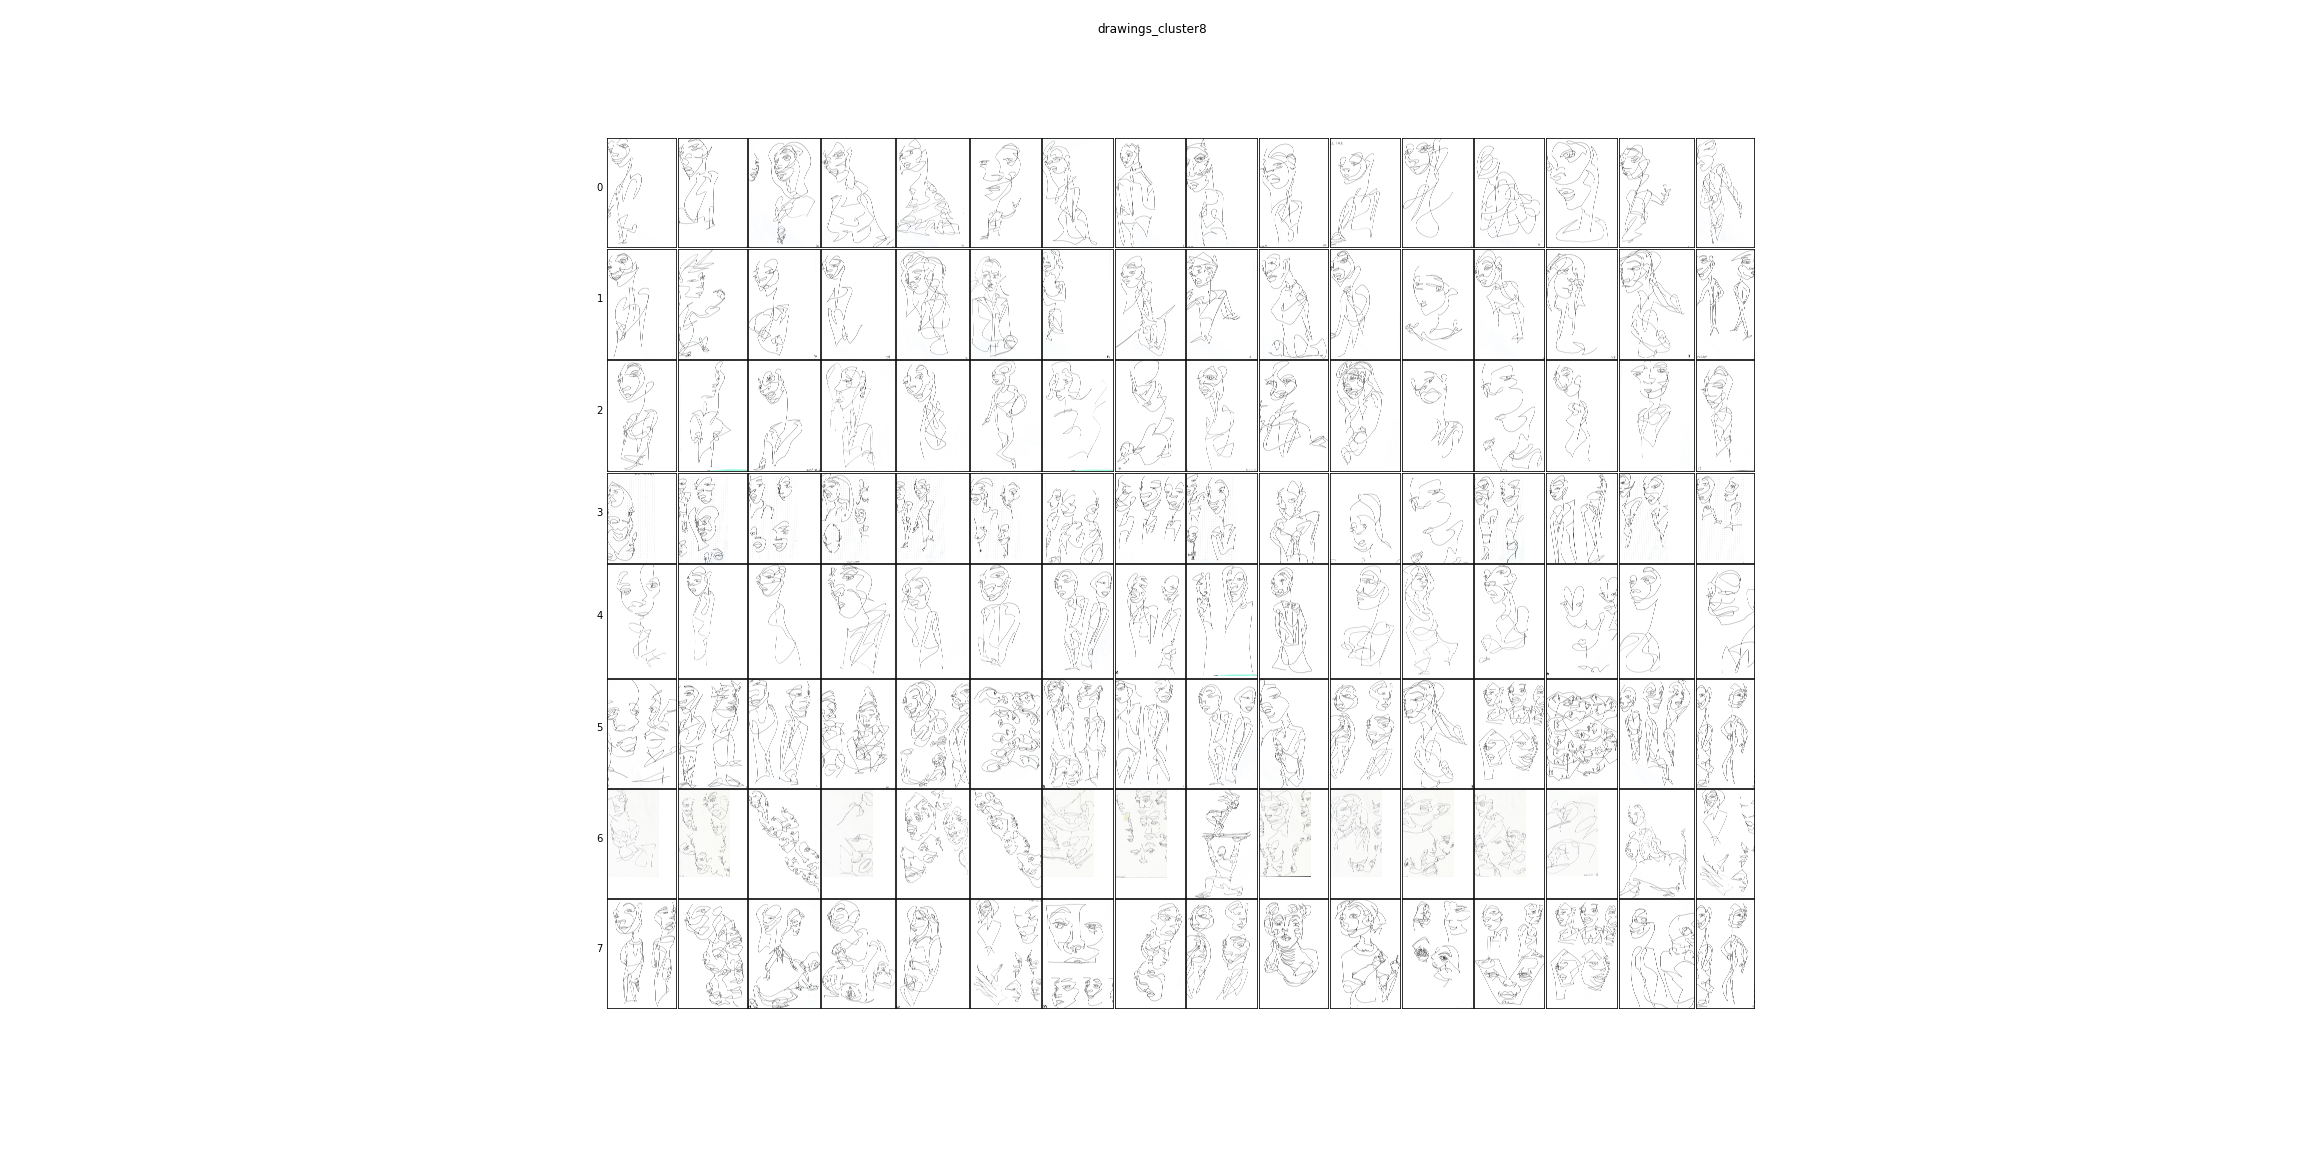

In [ ]:
Image.open(f"{subclusters_dir}/{cluster_col}.png")

cluster_idx = 0, clusters = [271, 814, 1682, 932, 600, 391, 1058, 878, 368, 149, 1442, 364, 1858, 1037, 1382, 945]
cluster_idx = 1, clusters = [542, 1292, 1634, 1274, 704, 19, 80, 919, 1244, 609, 771, 129, 334, 1102, 1364, 1553]
cluster_idx = 2, clusters = [274, 1408, 268, 521, 20, 913, 345, 1257, 523, 286, 190, 1401, 1021, 636, 1139, 1095]
cluster_idx = 3, clusters = [653, 1733, 1591, 300, 1397, 905, 808, 912, 1641, 749, 249, 1021, 1576, 900, 48, 1882]
cluster_idx = 4, clusters = [1727, 1805, 714, 1204, 848, 258, 562, 309, 172, 687, 3, 763, 92, 1898, 277, 1423]
cluster_idx = 5, clusters = [1607, 649, 597, 1072, 1316, 266, 573, 999, 562, 956, 918, 1364, 927, 896, 1129, 678]
cluster_idx = 6, clusters = [305, 1517, 319, 16, 394, 1769, 308, 1673, 1418, 1637, 489, 1891, 909, 1827, 583, 1047]
cluster_idx = 7, clusters = [1716, 1381, 370, 842, 530, 1047, 1809, 989, 918, 76, 1332, 871, 346, 927, 257, 678]


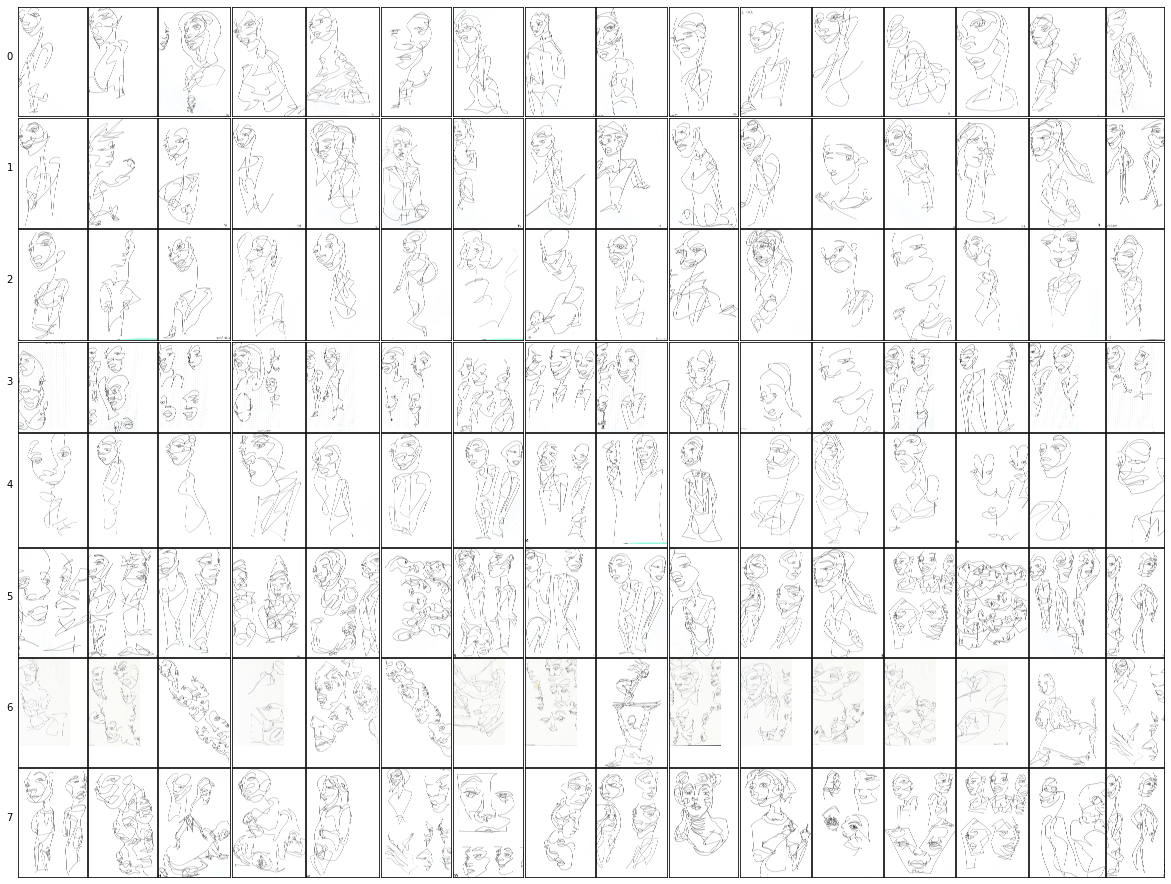

In [ ]:
show_all_clusters(
    clusters_df=clustered_drawings_df,
    clusters=I,
    # title=cluster_col,
    size_factor=2.0,
    # fname=f"{subclusters_dir}/{cluster_col}.png",
)

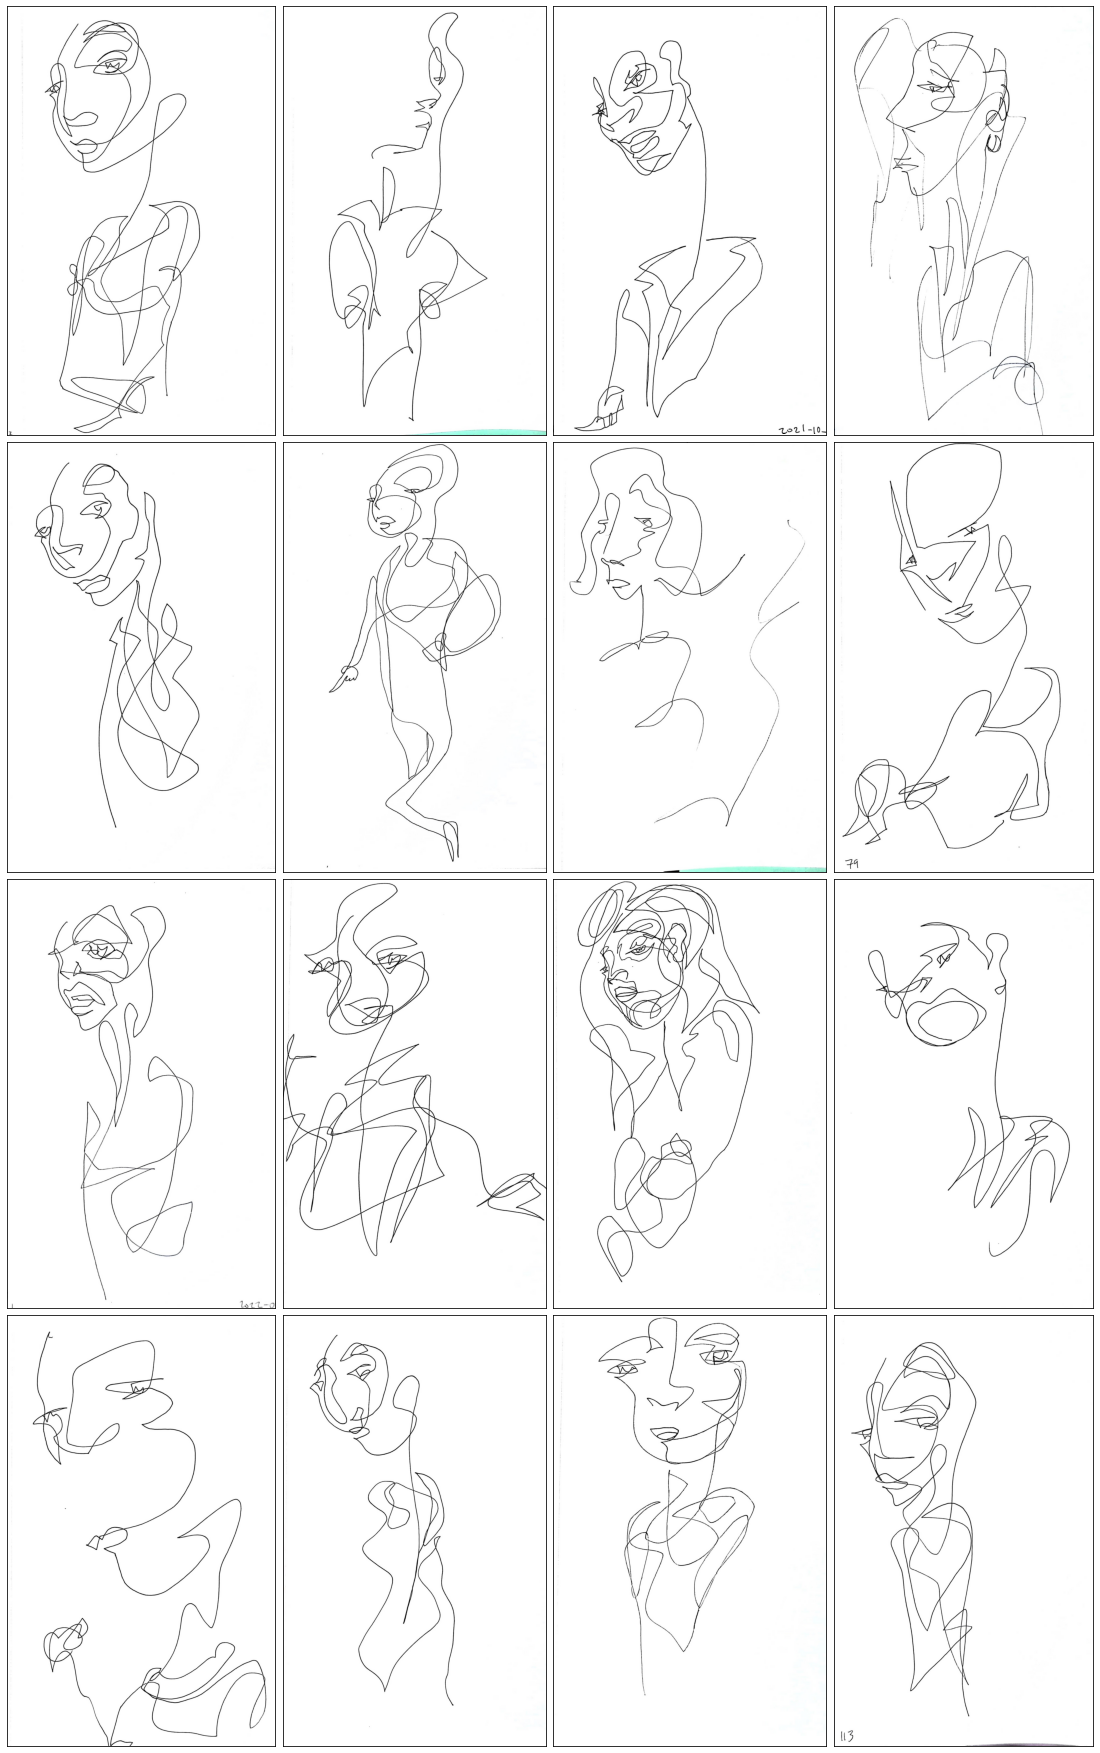

In [ ]:
cid = 2
show_cluster(
    clusters_df=clustered_drawings_df,
    clusters=I,
    idx=cid,
    size_factor=2.0,
    # fname=f"{subclusters_dir}/{cluster_col}__{cid:02d}.png",
)

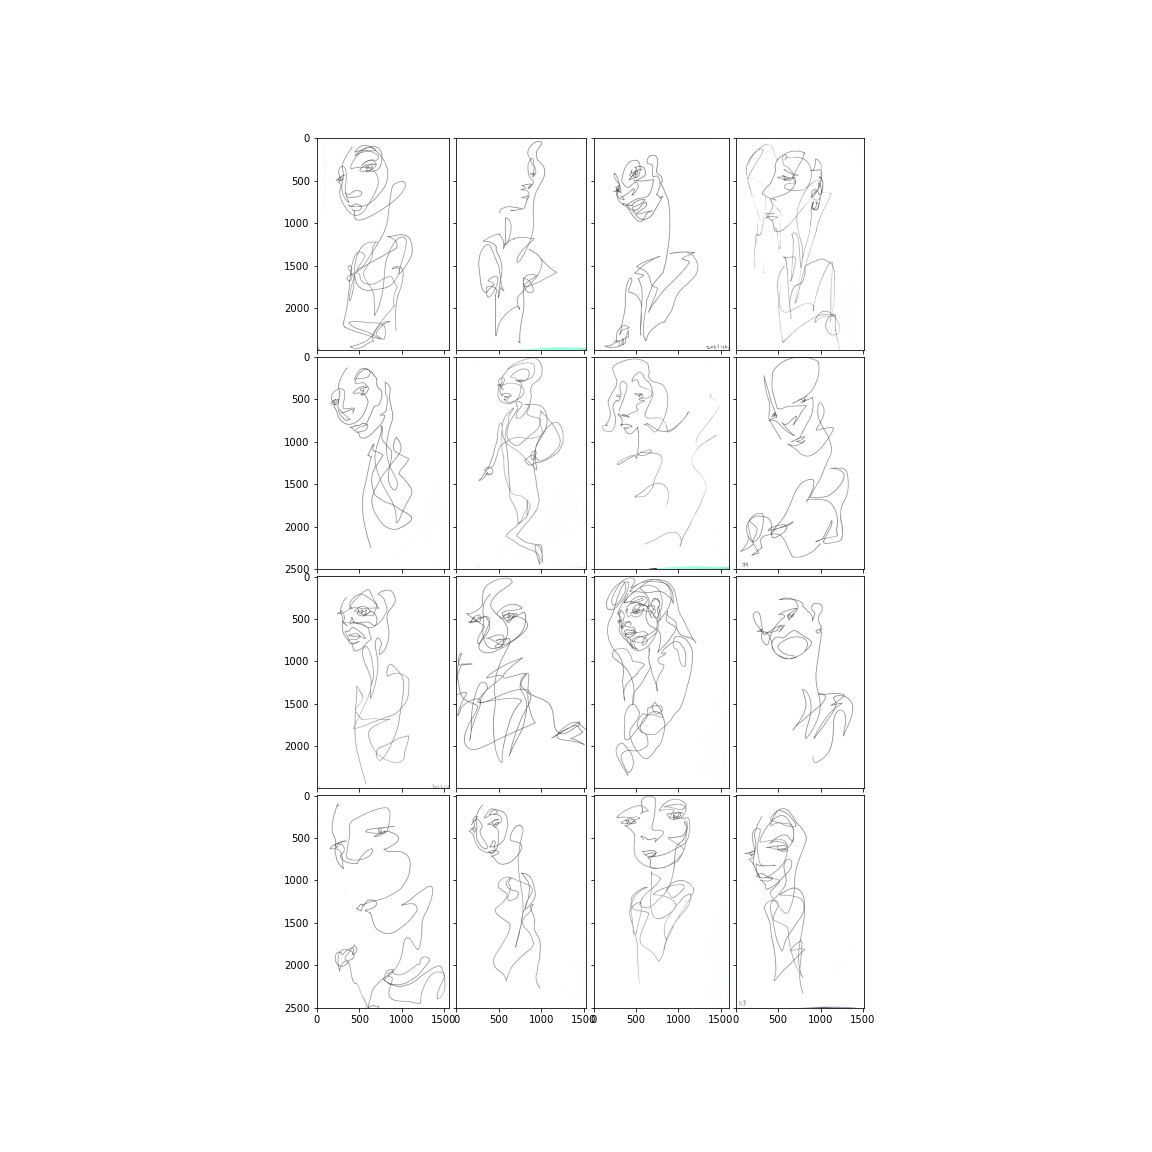

In [ ]:
# Image.open(f"{subclusters_dir}/{cluster_col}__{cid:02d}.png")

## Save summary images (all clusters and per-cluster)

In [ ]:
# inspect shape of cluster centroid data
for emb_type, cluster_colnames in drawing_centroids.items():
    print(emb_type)
    for cluster_col, saved_data in cluster_colnames.items():
        D, I = saved_data
        print("\t" + cluster_col)

        overview_fname = f"{subclusters_dir}/{cluster_col}.png"
        if not os.path.exists(overview_fname):
            show_all_clusters(
                clusters_df=clustered_drawings_df,
                clusters=I,
                size_factor=2.0,
                fname=overview_fname,
            )
            print(f"\tsaved {overview_fname}")
        else:
            print(f"\t(exists) {overview_fname}")

        for cid in range(len(I)):
            print(f"\t\tsubcluster {cid}")
            cid_fname = f"{subclusters_dir}/{cluster_col}__{cid:02d}.png"
            if not os.path.exists(cid_fname):
                show_cluster(
                    clusters_df=clustered_drawings_df,
                    clusters=I,
                    idx=cid,
                    size_factor=2.0,
                    fname=cid_fname,
                )
                print(f"\t\tsaved {cid_fname}")
            else:
                print(f"\t\t(exists) {cid_fname}")

drawings_emdb
	drawings_cluster8
	(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8.png
		subcluster 0
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__00.png
		subcluster 1
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__01.png
		subcluster 2
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__02.png
		subcluster 3
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__03.png
		subcluster 4
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__04.png
		subcluster 5
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__05.png
		subcluster 6
		(exists) /Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/04_SUBCLUSTERS/drawings_cluster8__06

In [ ]:
# for cid in range(len(I)):
#     show_cluster(
#         clusters_df=clustered_drawings_df,
#         clusters=I,
#         idx=cid,
#         fname=f"{subclusters_dir}/{cluster_col}__{cid:02d}.png",
#     )

8

In [ ]:
# clustered_drawings_df.iloc[2].preprocessed_abs_path

'/Users/al/Dropbox/2-Areas/2-Sketchbooks/datasets/full-v2/10_SIMPLE_CROP/0_drawings/sb25p227.jpg'

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()